In [1]:
import pandas as pd

In [2]:
!tar -xvf BraTS2021_00495.tar

x ./
x ./BraTS2021_00495_flair.nii.gz
x ./BraTS2021_00495_seg.nii.gz
x ./BraTS2021_00495_t1.nii.gz
x ./BraTS2021_00495_t1ce.nii.gz
x ./BraTS2021_00495_t2.nii.gz


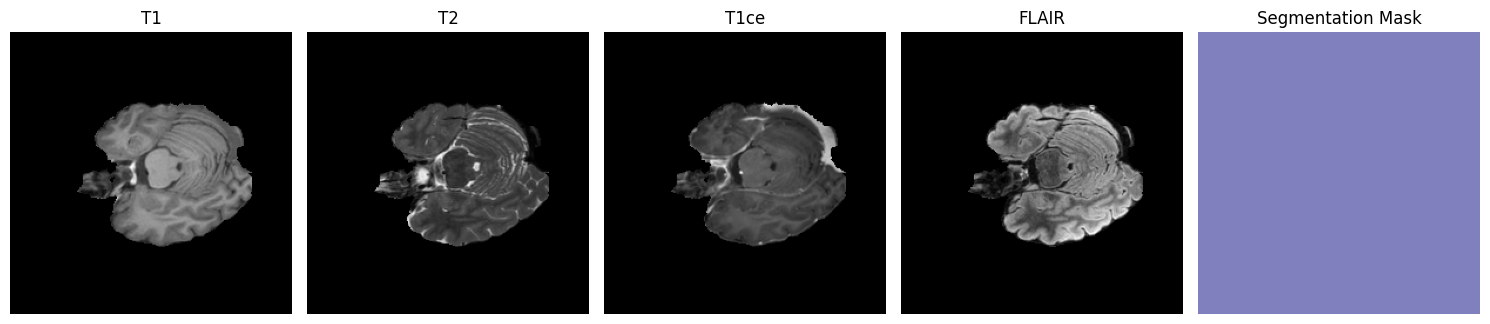

In [ ]:
# Import necessary libraries
import os  # For file path operations
import nibabel as nib  # For reading .nii medical image files
import numpy as np  # For handling numerical arrays
import matplotlib.pyplot as plt  # For displaying images

file_path = "BraTS2021_00495_seg.nii" 

# Define a function to load a NIfTI file and return image data
def load_nifti(file_path):
    """
    Loads a NIfTI MRI file and returns the image data as a NumPy array.
    
    :param file_path: Path to the NIfTI file (string)
    :return: NumPy array of the image data
    """
    # Check if the file exists at the specified path
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    # Load the NIfTI file using nibabel
    nifti_img = nib.load(file_path)

    # Convert image object to NumPy array and return
    return nifti_img.get_fdata()


# Define a function to display MRI images and overlay the segmentation mask
def display_mri_with_mask(modalities, mask, slice_idx=50):
    """
    Displays multiple MRI modalities along with their segmentation mask overlay.

    :param modalities: Dictionary where keys are modality names (e.g., 'T1', 'T2') 
                       and values are 3D NumPy arrays of the MRI scans
    :param mask: 3D NumPy array of the segmentation mask
    :param slice_idx: The slice index along the Z-axis (axial plane) to visualize
    """
    # Count how many MRI types/modalities are being passed in
    num_modalities = len(modalities)

    # Set up a row of subplots (one for each modality + one for the mask)
    fig, axes = plt.subplots(1, num_modalities + 1, figsize=(15, 5))

    # Loop through each modality and plot its slice
    for i, (modality, image) in enumerate(modalities.items()):
        axes[i].imshow(image[:, :, slice_idx], cmap="gray")  # Show MRI in grayscale
        axes[i].set_title(modality)  # Set the title as modality name
        axes[i].axis("off")  # Remove axes

    # Plot the segmentation mask overlay on the last subplot
    axes[num_modalities].imshow(mask[:, :, slice_idx], cmap="jet", alpha=0.5)  # Jet = color overlay
    axes[num_modalities].set_title("Segmentation Mask")
    axes[num_modalities].axis("off")

    # Show all plots once after the loop
    plt.tight_layout()
    plt.show()


# ---------------- MAIN EXECUTION ---------------- #

# Define the file paths for each MRI modality
mri_paths = {
    "T1": "BraTS2021_00495_t1.nii.gz",
    "T2": "BraTS2021_00495_t2.nii.gz",
    "T1ce": "BraTS2021_00495_t1ce.nii.gz",
    "FLAIR": "BraTS2021_00495_flair.nii.gz",
}

# Define the file path for the segmentation mask
mask_path = "BraTS2021_00495_seg.nii.gz"

# Check if all files (modalities + mask) exist before continuing
for path in list(mri_paths.values()) + [mask_path]:
    if not os.path.exists(path):
        print(f"Error: File not found -> {path}")
        exit()  # Stop program if any file is missing

# Load each MRI modality using the helper function
modalities = {modality: load_nifti(path) for modality, path in mri_paths.items()}

# Load the segmentation mask
segmentation_mask = load_nifti(mask_path)

# Display the MRI slices alongside the segmentation mask overlay
display_mri_with_mask(modalities, segmentation_mask)


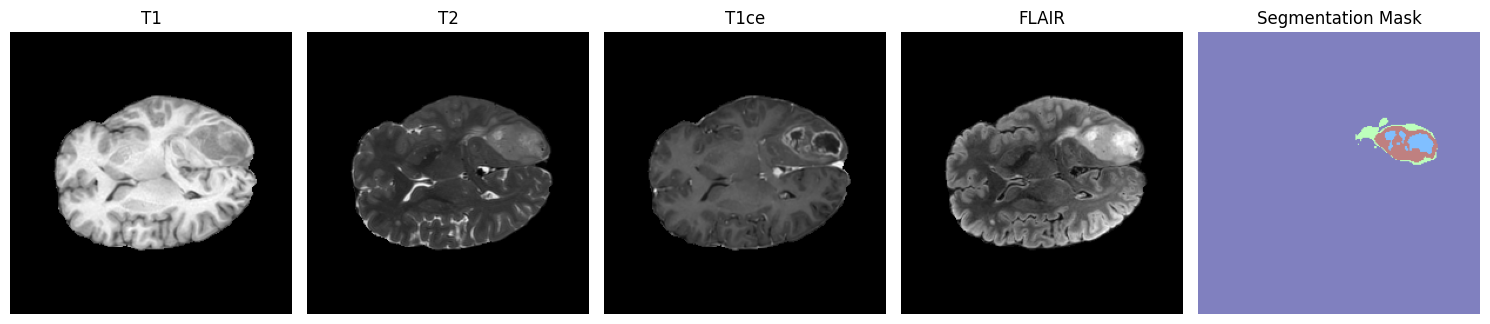

In [2]:

# Extract the middle slice along the axial plane (Z-axis)
middle_slices = {
    modality: image[:, :, image.shape[2] // 2]  # Middle slice
    for modality, image in modalities.items()
}
middle_mask = segmentation_mask[:, :, segmentation_mask.shape[2] // 2]  # Middle mask slice

# Plot the MRI slices and segmentation mask
fig, axes = plt.subplots(1, len(middle_slices) + 1, figsize=(15, 5))

for i, (modality, slice_image) in enumerate(middle_slices.items()):
    axes[i].imshow(slice_image, cmap="gray")
    axes[i].set_title(modality)
    axes[i].axis("off")

# Plot the segmentation mask
axes[len(middle_slices)].imshow(middle_mask, cmap="jet", alpha=0.5)
axes[len(middle_slices)].set_title("Segmentation Mask")
axes[len(middle_slices)].axis("off")

plt.tight_layout()
plt.show()

In [3]:
import torchio as tio
# Step 1: Load T1 modality image as NumPy array
t1_path = "BraTS2021_00495_t1.nii.gz"  # Update this to your correct path
t1_img = nib.load(t1_path)
image_np = t1_img.get_fdata().astype(np.float32)

ModuleNotFoundError: No module named 'torchio'